Welcome to the Logistic regression model for CS4650 Big Data, Analysis, and Cloud Computing.

This model is using a dataset from the Kaggle Competition:

`Housing Prices - Advanced Regression Techniques`

The dataset includes these features and their descriptions:

---

    1. MSSubClass: Identifies the type of dwelling involved in the sale. (categorical) 
    
    2. MSZoning: Identifies the general zoning classification of the sale. (categorical)
    
    3. LotFrontage: Linear feet of street connected to property (numeric)
    
    4. LotArea: Lot size in square feet (numeric)
    
    5. Street: Type of road access to property (categorical)
    
    6. Alley: Type of alley access to property (categorical)
    
    7. LotShape: General shape of property (categorical)
    
    8. LandContour: Flatness of the property (categorical)
    
    9. Utilities: Type of utilities available (categorical)
    
    10. LotConfig: Lot configuration (categorical)
    
    11. LandSlope: Slope of property (categorical)
    
    12. Neighborhood: Physical locations within Ames city limits (categorical)
    
    13. Condition1: Proximity to various conditions (categorical)
    
    14. Condition2: Proximity to various conditions (if more than one is present) (categorical)
    
    15. BldgType: Type of dwelling (categorical)
    
    16. HouseStyle: Style of dwelling (categorical)
    
    17. OverallQual: Rates the overall material and finish of the house (categorical)
    
    18. OverallCond: Rates the overall condition of the house (categorical)
    
    19. YearBuilt: Original construction date (numeric)
    
    20. YearRemodAdd: Remodel date (same as construction date if no remodeling or additions) (numeric)
    
    21. RoofStyle: Type of roof (categorical)
    
    22. RoofMatl: Roof material (categorical)
    
    23. Exterior1st: Exterior covering on house (categorical)
    
    24. Exterior2nd: Exterior covering on house (if more than one material) (categorical)
    
    25. MasVnrType: Masonry veneer type (categorical)
    
    26. MasVnrArea: Masonry veneer area in square feet (numeric)
    
    27. ExterQual: Evaluates the quality of the material on the exterior (categorical)
    
    28. ExterCond: Evaluates the present condition of the material on the exterior (categorical)
    
    29. Foundation: Type of foundation (categorical)
    
    30. BsmtQual: Evaluates the height of the basement (categorical)
    
    31. BsmtCond: Evaluates the general condition of the basement (categorical)
    
    32. BsmtExposure: Refers to walkout or garden level walls (categorical)
    
    33. BsmtFinType1: Rating of basement finished area (categorical)
    
    34. BsmtFinSF1: Type 1 finished square feet (numeric)

    35. BsmtFinType2: Rating of basement finished area (if multiple types) (categorical)
    
    36. BsmtFinSF2: Type 2 finished square feet (numeric)
    
    37. BsmtUnfSF: Unfinished square feet of basement area (numeric)
    
    38. TotalBsmtSF: Total square feet of basement area (numeric)

    39. Heating: Type of heating (categorical)
    
    40. HeatingQC: Heating quality and condition (categorical)
    
    41. CentralAir: Central air conditioning (categorical)
    
    42. Electrical: Electrical system (categorical)
    
    43. 1stFlrSF: First Floor square feet (numeric)
    
    44. 2ndFlrSF: Second floor square feet (numeric)
    
    45. LowQualFinSF: Low quality finished square feet (all floors) (numeric)
    
    46. GrLivArea: Above grade (ground) living area square feet (numeric)
    
    47. BsmtFullBath: Basement full bathrooms (numeric)
    
    48. BsmtHalfBath: Basement half bathrooms (numeric)
    
    49. FullBath: Full bathrooms above grade (numeric)
    
    50. HalfBath: Half baths above grade (numeric)
    
    51. Bedroom: Bedrooms above grade (does NOT include basement bedrooms) (numeric)
    
    52. Kitchen: Kitchens above grade (numeric)
    
    53. KitchenQual: Kitchen quality (categorical)
    
    54. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) (numeric)
    
    55. Functional: Home functionality (Assume typical unless deductions are warranted)
    
    56. Fireplaces: Number of fireplaces (numeric)
    
    57. FireplaceQu: Fireplace quality (categorical)
    
    58. GarageType: Garage location (categorical)
    
    59. GarageYrBlt: Year garage was built (numeric)
    
    60. GarageFinish: Interior finish of the garage (categorical)
    
    61. GarageCars: Size of garage in car capacity (numeric)
    
    62. GarageArea: Size of garage in square feet (numeric)
    
    63. GarageQual: Garage quality (categorical)
    
    64. GarageCond: Garage condition (categorical)
    
    65. PavedDrive: Paved driveway (categorical)
    
    66. WoodDeckSF: Wood deck area in square feet (numeric)
    
    67. OpenPorchSF: Open porch area in square feet (numeric)
    
    68. EnclosedPorch: Enclosed porch area in square feet (numeric)
    
    69. 3SsnPorch: Three season porch area in square feet (numeric)
    
    70. ScreenPorch: Screen porch area in square feet (numeric)
    
    71. PoolArea: Pool area in square feet (numeric)
    
    72. PoolQC: Pool quality (categorical)
    
    73. Fence: Fence quality (categorical)
    
    74. MiscFeature: Miscellaneous feature not covered in other categories (categorical)
    
    75. MiscVal: $Value of miscellaneous feature (numeric)
    
    76. MoSold: Month Sold (MM) (numeric)
    
    77. YrSold: Year Sold (YYYY) (numeric)
    
    78. SaleType: Type of sale (categorical)
    
    79. SaleCondition: Condition of sale (categorical)


---    







In [202]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error

In [204]:
df_training= pd.read_csv("./train.csv")
df_testing = pd.read_csv("./test.csv")

In [206]:
print(df_training.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Creating the labels for the dataset

In [209]:
training_labels = pd.DataFrame(df_training['SalePrice'])

Data Preprocessing. Seperating columns based on Ordinal mapping and organizing them as such.

In [212]:
df_training.drop(columns = ['SalePrice'], inplace=True)

In [214]:
# Mapping for feature categories in columns 27,28,40,53 (1-5 scale)

five_scale_map = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0
}
# Fence has it's own scale so it will get its own mapping

fence_scale_map = {
    'GdPrv': 5,
    'MnPrv':4,
    'GdWo':3,
    'MnWw':2,
    'Na':1,
}
# Mapping for columns: 30,31,57,63,64 (0-5 because these columns include NA as a oridinal category)

six_scale_map = {
    'Ex':5,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1,
    'NA':0
}
# Pool has it's own scale

pool_scale_map = {
    'Ex':5,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'NA':1
}
# Basement has its own scale

basement_scale_map = {
    'GLQ':6,
    'ALQ':5,
    'BLQ':4,
    'Rec':3,
    'LwQ':2,
    'Unf':1,
    'NA':0
}
# Functional has its own scale

functional_scale_map = {
    'Typ':7,
    'Min1':6,
    'Min2':5,
    'Mod':4,
    'Maj1':3,
    'Maj2':2,
    'Sev':1,
    'Sal':0
}


In [216]:
columns_to_map = ['ExterQual','ExterCond','HeatingQC','KitchenQual']
df_training[columns_to_map] = df_training[columns_to_map].fillna('NA')
df_training[columns_to_map] = df_training[columns_to_map].map(lambda x: five_scale_map[x])

In [218]:
columns_to_map = ['Fence']
df_training['Fence'] = df_training['Fence'].fillna('Na')
df_training[columns_to_map] = df_training[columns_to_map].map(lambda x: fence_scale_map[x])

In [219]:
columns_to_map = ['BsmtQual','BsmtCond','FireplaceQu','GarageQual','GarageCond']
df_training[columns_to_map] = df_training[columns_to_map].fillna('NA')
df_training[columns_to_map] = df_training[columns_to_map].replace(six_scale_map)

C:\Users\rlars\AppData\Local\Temp\ipykernel_11996\2825100903.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_training[columns_to_map] = df_training[columns_to_map].replace(six_scale_map)


In [221]:
columns_to_map = ['PoolQC']
df_training[columns_to_map] = df_training[columns_to_map].fillna('NA')
df_training[columns_to_map] = df_training[columns_to_map].replace(pool_scale_map)

C:\Users\rlars\AppData\Local\Temp\ipykernel_11996\3921994822.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_training[columns_to_map] = df_training[columns_to_map].replace(pool_scale_map)


In [224]:
columns_to_map = ['BsmtFinType1','BsmtFinType2']
df_training[columns_to_map] = df_training[columns_to_map].fillna('NA')
df_training[columns_to_map] = df_training[columns_to_map].replace(basement_scale_map)

C:\Users\rlars\AppData\Local\Temp\ipykernel_11996\1857668253.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_training[columns_to_map] = df_training[columns_to_map].replace(basement_scale_map)


In [226]:
columns_to_map = ['Functional']
df_training[columns_to_map] = df_training[columns_to_map].fillna('NA')
df_training[columns_to_map] = df_training[columns_to_map].replace(functional_scale_map)

C:\Users\rlars\AppData\Local\Temp\ipykernel_11996\783639280.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_training[columns_to_map] = df_training[columns_to_map].replace(functional_scale_map)


In [228]:
object_columns_training = df_training.loc[:, df_training.dtypes == object]
df_converted_training = pd.get_dummies(df_training, columns= object_columns_training.columns)
df_converted_training.sample(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1323,1324,30,50.0,5330,4,7,1940,1950,0.0,2,3,3,3,2,280,1,0,140,420,4,708,0,0,708,0,0,1,0,2,1,2,5,7,0,0,NaN,0,0,0,0,164,0,0,0,0,0,1,1,0,12,2009,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,True,False,False,F

Creating the Test Dataset

In [231]:
columns_to_map = ['ExterQual','ExterCond','HeatingQC','KitchenQual']
df_testing[columns_to_map] = df_testing[columns_to_map].fillna('NA')
df_testing[columns_to_map] = df_testing[columns_to_map].map(lambda x: five_scale_map[x])

In [233]:
columns_to_map = ['Fence']
df_testing['Fence'] = df_testing['Fence'].fillna('Na')
df_testing[columns_to_map] = df_testing[columns_to_map].map(lambda x: fence_scale_map[x])

In [235]:
columns_to_map = ['BsmtQual','BsmtCond','FireplaceQu','GarageQual','GarageCond']
df_testing[columns_to_map] = df_testing[columns_to_map].fillna('NA')
df_testing[columns_to_map] = df_testing[columns_to_map].replace(six_scale_map)

C:\Users\rlars\AppData\Local\Temp\ipykernel_11996\3804268983.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_testing[columns_to_map] = df_testing[columns_to_map].replace(six_scale_map)


In [237]:
columns_to_map = ['PoolQC']
df_testing[columns_to_map] = df_testing[columns_to_map].fillna('NA')
df_testing[columns_to_map] = df_testing[columns_to_map].replace(pool_scale_map)

C:\Users\rlars\AppData\Local\Temp\ipykernel_11996\3249251333.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_testing[columns_to_map] = df_testing[columns_to_map].replace(pool_scale_map)


In [239]:
columns_to_map = ['BsmtFinType1','BsmtFinType2']
df_testing[columns_to_map] = df_testing[columns_to_map].fillna('NA')
df_testing[columns_to_map] = df_testing[columns_to_map].replace(basement_scale_map)

C:\Users\rlars\AppData\Local\Temp\ipykernel_11996\1968574111.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_testing[columns_to_map] = df_testing[columns_to_map].replace(basement_scale_map)


In [241]:
columns_to_map = ['Functional']
df_testing[columns_to_map] = df_testing[columns_to_map].fillna('NA')
df_testing[columns_to_map] = df_testing[columns_to_map].replace(functional_scale_map)
df_testing.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
324,1785,30,RL,60.0,10230,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,7,1925,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,3,3,BrkTil,3,3,No,1,0.0,1,0.0,1054.0,1054.0,GasA,5,Y,SBrkr,1078,0,0,1078,0.0,0.0,1,0,3,1,5,6,7,0,0,Detchd,1987.0,Unf,1.0,264.0,3,3,N,0,0,0,0,112,0,1,3,NaN,0,12,2009,WD,Normal
1331,2792,50,C (all),63.0,4761,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Unf,3,3,1918,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,2,2,BrkTil,3,2,No,1,0.0,1,0.0,1020.0,1020.0,GasA,2,N,FuseP,1020,0,0,1020,0.0,0.0,1,0,2,1,2,5,7,0,0,NaN,NaN,NaN,0.0,0.0,0,0,N,0,0,105,0,0,0,1,1,NaN,0,10,2006,ConLD,Normal
948,2409,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1960,1960,Hip,CompShg,HdBoard,HdBoard,BrkCmn,69.0,3,3,CBlock,3,3,No,1,0.0,1,0.0,1144.0,1144.0,GasA,3,Y,SBrkr,1144,0,0,1144,0.0,0.0,1,0,3,1,3,6,7,1,4,Attchd,1960.0,RFn,1.0,336.0,3,3,Y,0,0,0,0,0,0,1,1,NaN,0,6,2007,WD,Normal
696,2157,20,RL,80.0,9938,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,1994,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,251.0,4,3,PConc,4,3,No,6,1271.0,1,0.0,331.0,1602.0,GasA,5,Y,SBrkr,1626,0,0,1626,1.0,0.0,2,1,3,1,4,7,7,1,3,Attchd,1994.0,RFn,2.0,534.0,3,3,Y,424,40,0,0,0,0,1,1,NaN,0,4,2008,WD,Normal
118,1579,85,RL,82.0,11105,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,SFoyer,5,5,1996,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,3,4,PConc,4,2,Av,6,870.0,1,0.0,0.0,870.0,GasA,4,Y,SBrkr,965,0,0,965,1.0,0.0,1,0,2,1,3,4,7,0,0,Attchd,1998.0,Unf,2.0,580.0,4,3,Y,71,0,0,0,0,0,1,5,NaN,0,7,2010,WD,Normal


In [243]:
object_columns_testing = df_testing.loc[:, df_training.dtypes == object]
df_converted_testing = pd.get_dummies(df_testing, columns= object_columns_training.columns)
df_converted_testing.sample(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1259,2720,20,78.0,10140,7,6,1967,1967,264.0,3,3,3,3,4,553.0,2,68.0,713.0,1334.0,4,1334,0,0,1334,1.0,0.0,2,0,3,1,3,7,7,0,0,1967.0,2.0,477.0,3,3,0,20,35,0,264,0,1,1,0,4,2006,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,Fal

In [245]:
common_cols = [col for col in df_converted_training.columns if col in df_converted_testing.columns]
df_converted_training = df_converted_training[common_cols]
df_converted_training.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=219)

The following cell will convert the True / False to 1 and 0 values

In [248]:
df_converted_training = df_converted_training*1
df_converted_training.sample(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
886,887,90,70.0,8393,5,5,1959,2005,122.0,3,3,3,3,2,528,1,0,1098,1626,5,1712,0,0,1712,0,0,2,0,4,2,3,8,7,0,0,2005.0,2,588,3,3,272,54,0,0,0,0,1,1,0,6,2006,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
540,541,20,85.0,14601,9,5,2006,2006,584.0,5,3,5,3,6,1260,1,0,578,1838,5,

In [250]:
df_converted_testing = df_converted_testing*1
df_converted_testing.sample(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
485,1946,20,NaN,31220,6,2,1952,1952,0.0,3,3,3,3,1,0.0,1,0.0,1632.0,1632.0,3,1474,0,0,1474,0.0,0.0,1,0,3,1,3,7,5,2,4,1952.0,2.0,495.0,3,3,0,0,144,0,0,0,1,1,750,5,2008,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
374,1835,190,41.0,5852,7,5,1902,2000,188.0,3,2,3,2,3,169.0

Creating Scaled Training Dataset Using Standard Scaler

In [253]:
scaler_Standard = StandardScaler()

columns_to_scaler_Standard_training = df_converted_training.drop(columns=['Id'])
scaled_data_Standard_training = scaler_Standard.fit_transform(columns_to_scaler_Standard_training)

scaled_df_Standard_training = pd.DataFrame(scaled_data_Standard_training, columns=columns_to_scaler_Standard_training.columns)
scaled_df_Standard_training = pd.concat([df_converted_training[['Id']], scaled_df_Standard_training], axis=1)
scaled_df_Standard_training.fillna(0.0, inplace = True)
scaled_df_Standard_training.drop(columns = ['Id'], inplace=True)

scaled_df_Standard_training.sample(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1325,-0.636078,-1.237916,-0.689611,-1.518467,-1.416142,-1.631786,-1.689368,-0.572835,-0.689604,-0.238112,-0.558153,-1.693810,-1.208270,-0.973018,-0.277189,-0.288653,0.517889,-0.596115,-2.236518,-0.948691,-0.795163,-0.120242,-1.369623,-0.819964,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.771091,-0.934130,0.237044,-0.951226,-1.008334,0.000000,-2.365440,-2.212963,-3.888844,-3.904300,-0.752176,-0.704483,1.277384,-0.116339,-0.270208,-0.068692,-0.063796,2.021681,-0.087688,-1.969111,0.138777,-0.083045,-0.215859,-0.105263,-1.930005,2.386891,-0.064238,0.064

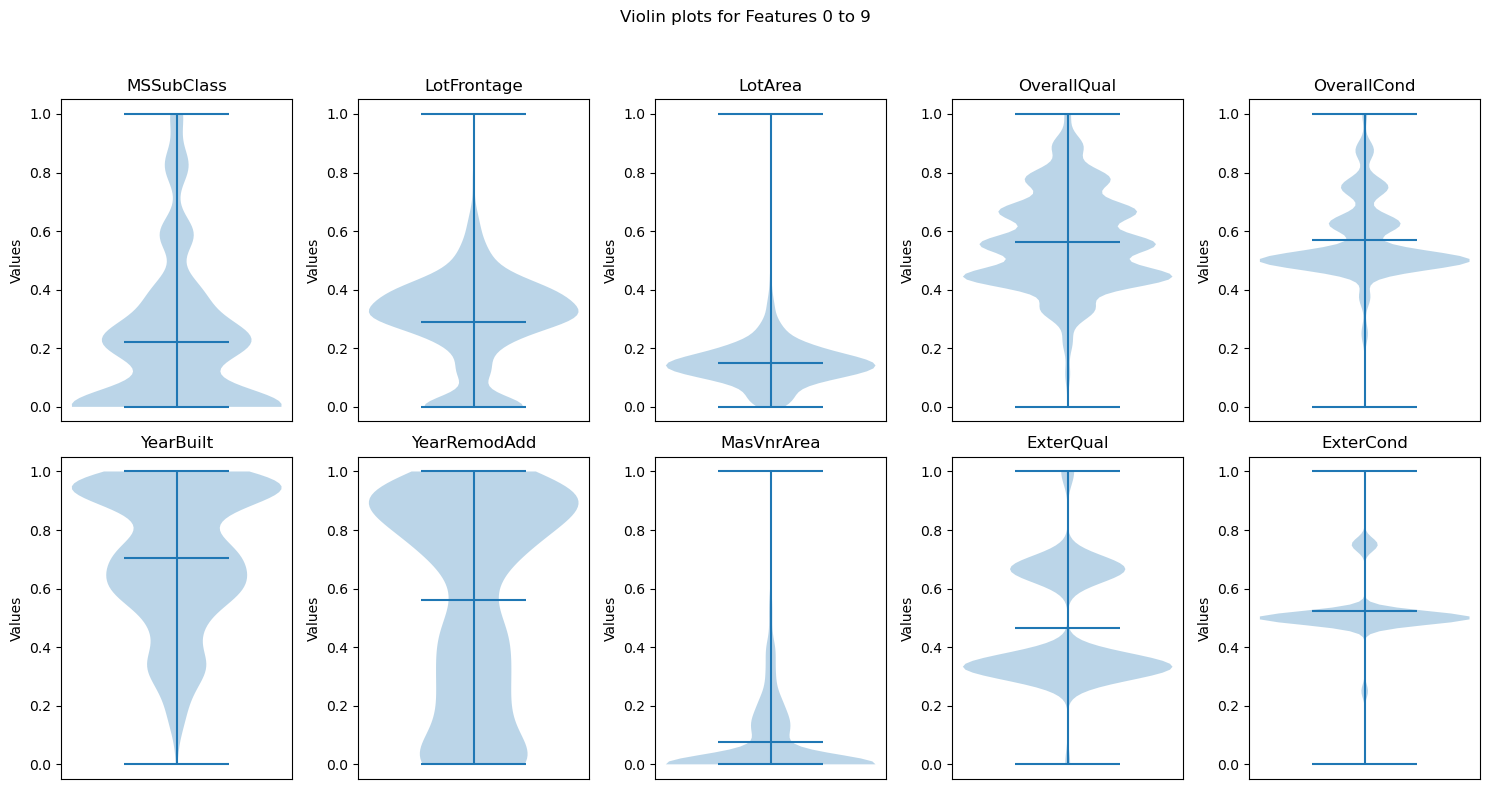

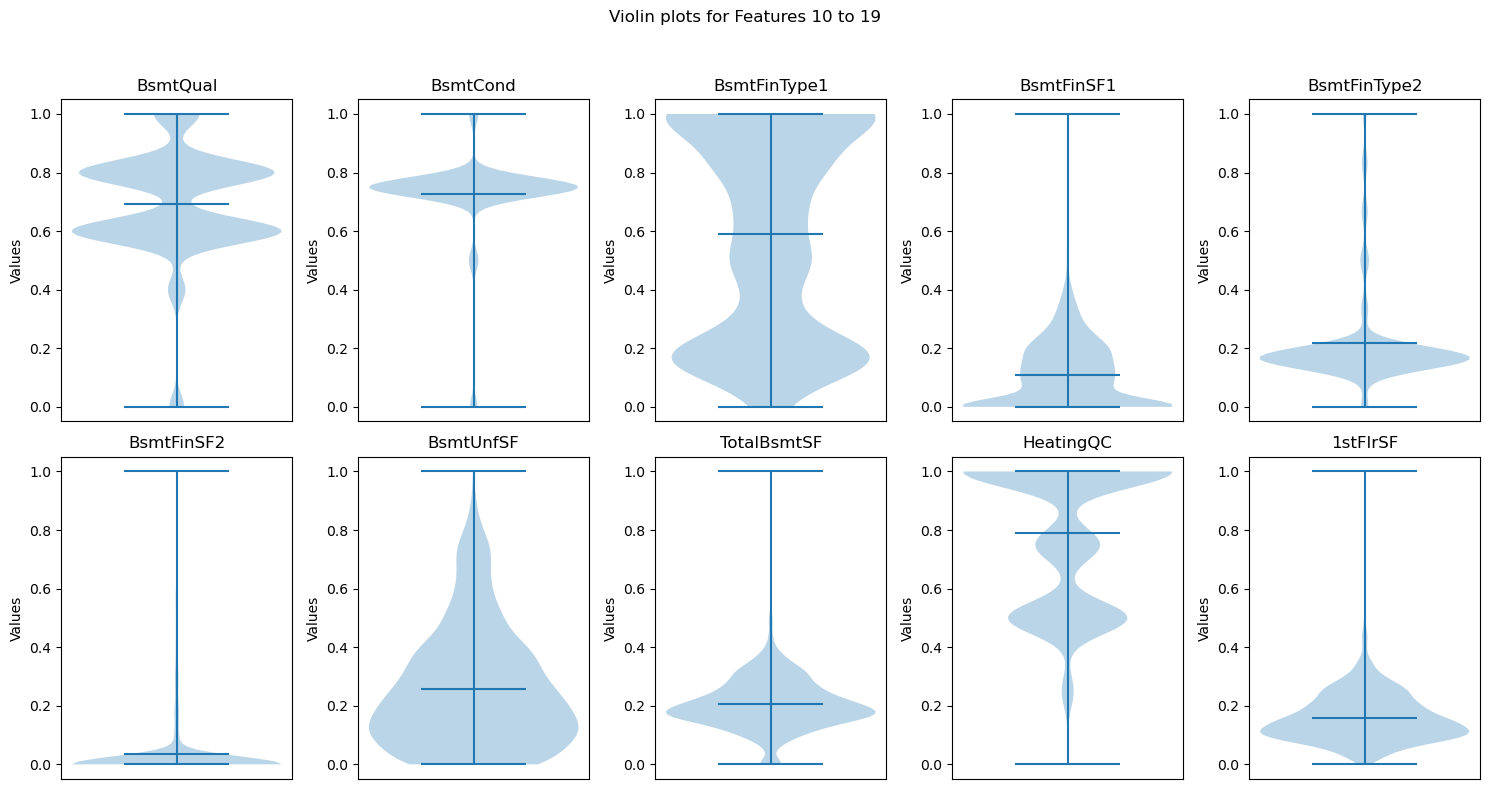

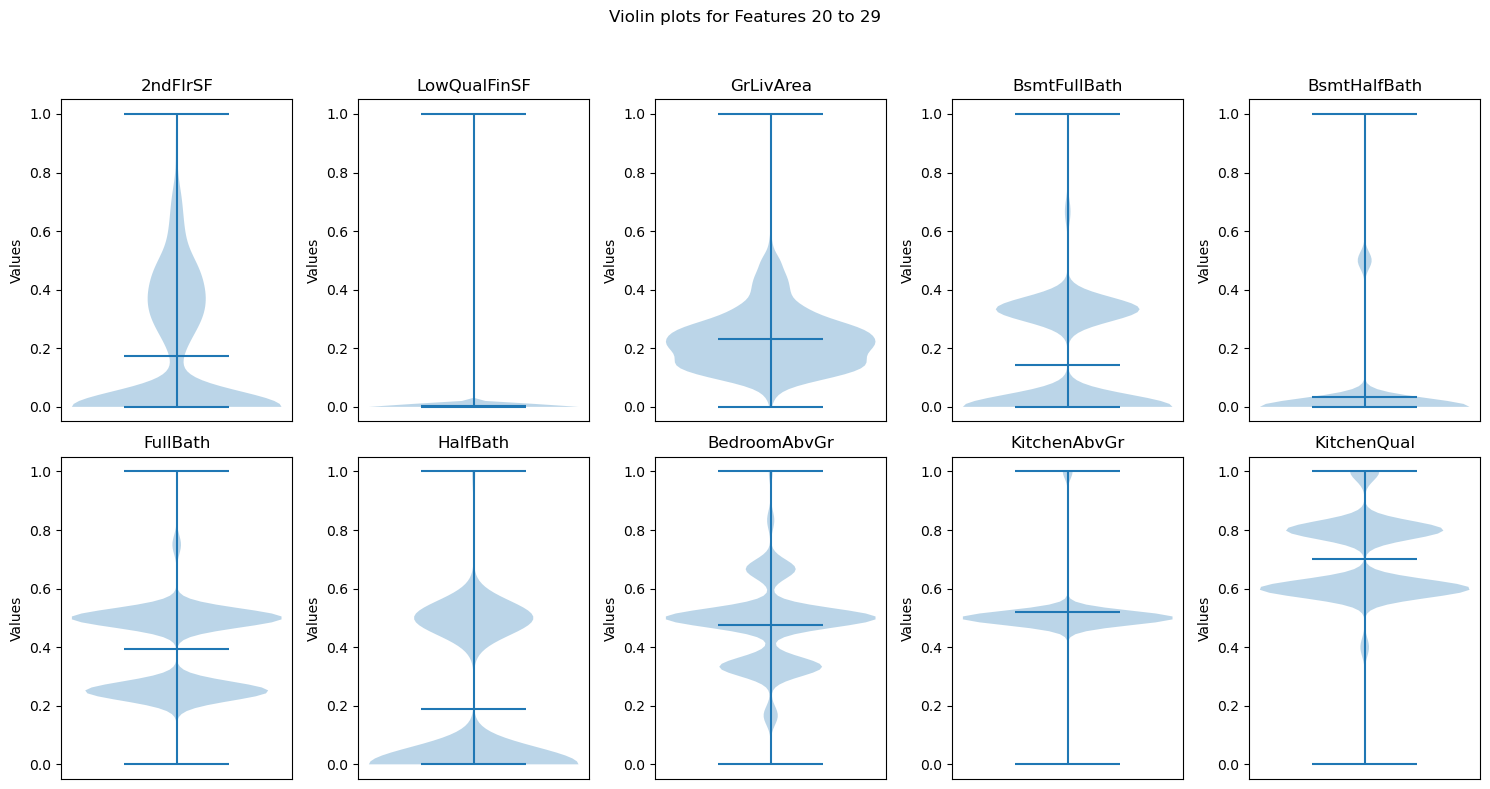

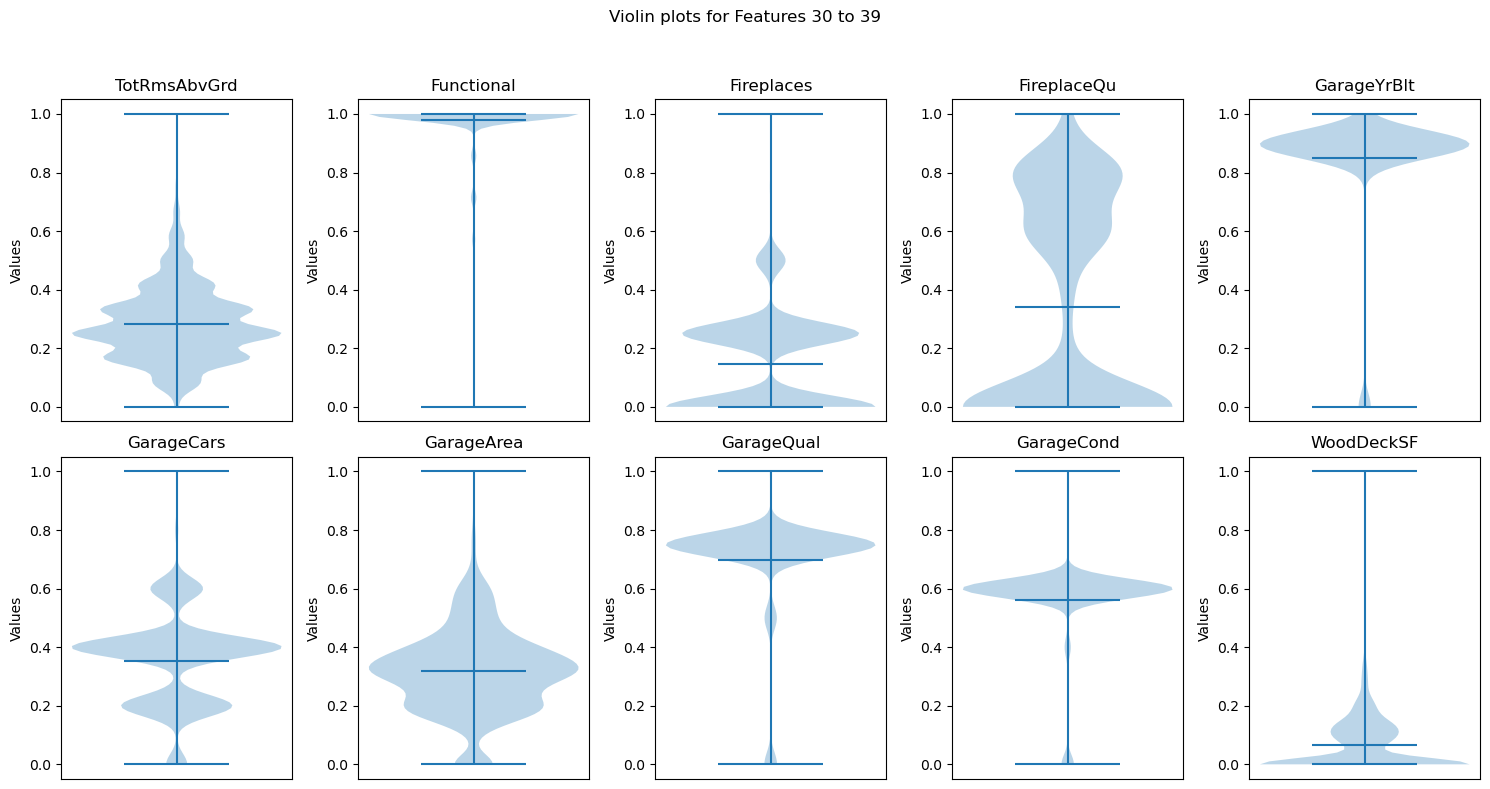

In [255]:
num_figures = len(scaled_df_Standard_training.columns[0:42]) // 10
for i in range(num_figures):
    start_col = i * 10
    end_col = start_col + 10
    chunk = scaled_df_MinMax_testing.iloc[:, start_col:end_col]

    plt.figure(figsize = (15,8))
    for j, column in enumerate(chunk.columns):
        plt.subplot(2,5,j+1)
        plt.violinplot(chunk[column],showmeans=True)
        plt.title(column)
        plt.xticks([])
        plt.ylabel('Values')
    plt.suptitle(f'Violin plots for Features {start_col} to {end_col -1 }')
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

Creating Scaled Testing Dataset Using Standard Scaler

In [257]:
columns_to_scaler_Standard_testing = df_converted_testing.drop(columns=['Id'])
columns_to_scaler_Standard_testing = columns_to_scaler_Standard_testing.replace('NA',0)
columns_to_scaler_Standard_testing = columns_to_scaler_Standard_testing.fillna(0.0)
scaled_data_Standard_testing = scaler_Standard.fit_transform(columns_to_scaler_Standard_testing)

scaled_df_Standard_testing = pd.DataFrame(scaled_data_Standard_testing, columns=columns_to_scaler_Standard_testing.columns)
scaled_df_Standard_testing = pd.concat([df_converted_testing[['Id']], scaled_df_Standard_testing], axis=1)
scaled_df_Standard_testing.drop(columns = ['Id'], inplace=True)

scaled_df_Standard_testing.sample(5)

C:\Users\rlars\AppData\Local\Temp\ipykernel_11996\610285853.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  columns_to_scaler_Standard_testing = columns_to_scaler_Standard_testing.replace('NA',0)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
367,-0.172665,-0.214237,-0.746729,-0.751101,0.400766,-1.098030,-1.593638,-0.563316,-0.678102,-0.223518,-0.499340,-1.512346,-0.725201,-0.364540,-0.296222,-0.297689,0.286104,-0.210628,-1.211189,-0.408348,0.623195,-0.080483,0.197681,-0.818068,-0.25816,0.773083,-0.751040,0.175997,-0.20391,-0.761697,-0.255371,0.23443,0.647066,1.271426,0.148127,-0.984704,-1.023900,-1.117130,0.271153,0.750387,-0.701628,0.145179,7.336579,-0.301543,-0.057227,-0.045021,-0.484229,-0.092244,-1.508059,0.945440,-0.101921,-0.231148,-0.083074,-1.796938,2.242527,-0.06426,0.06426,-0.22449,-0

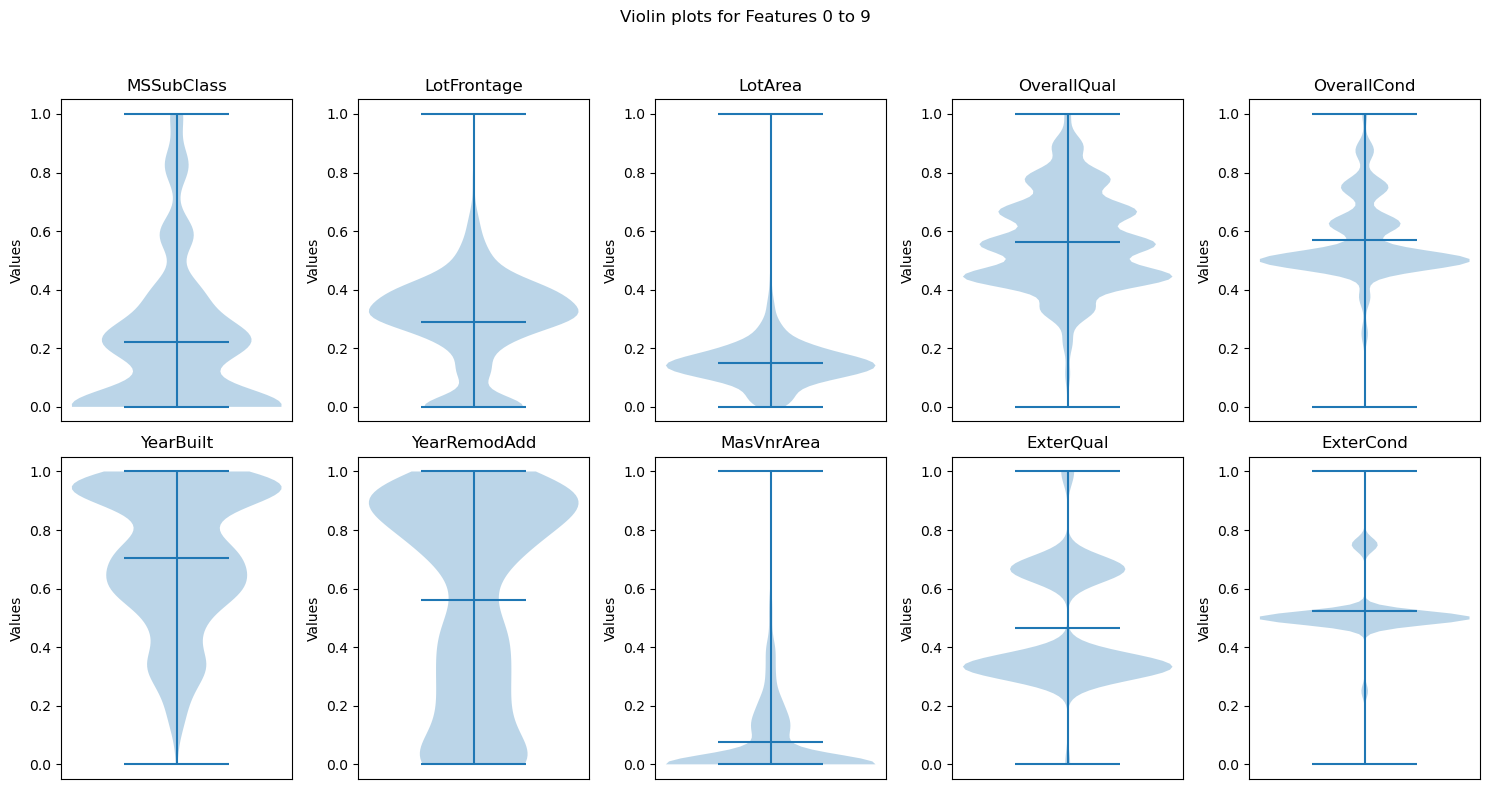

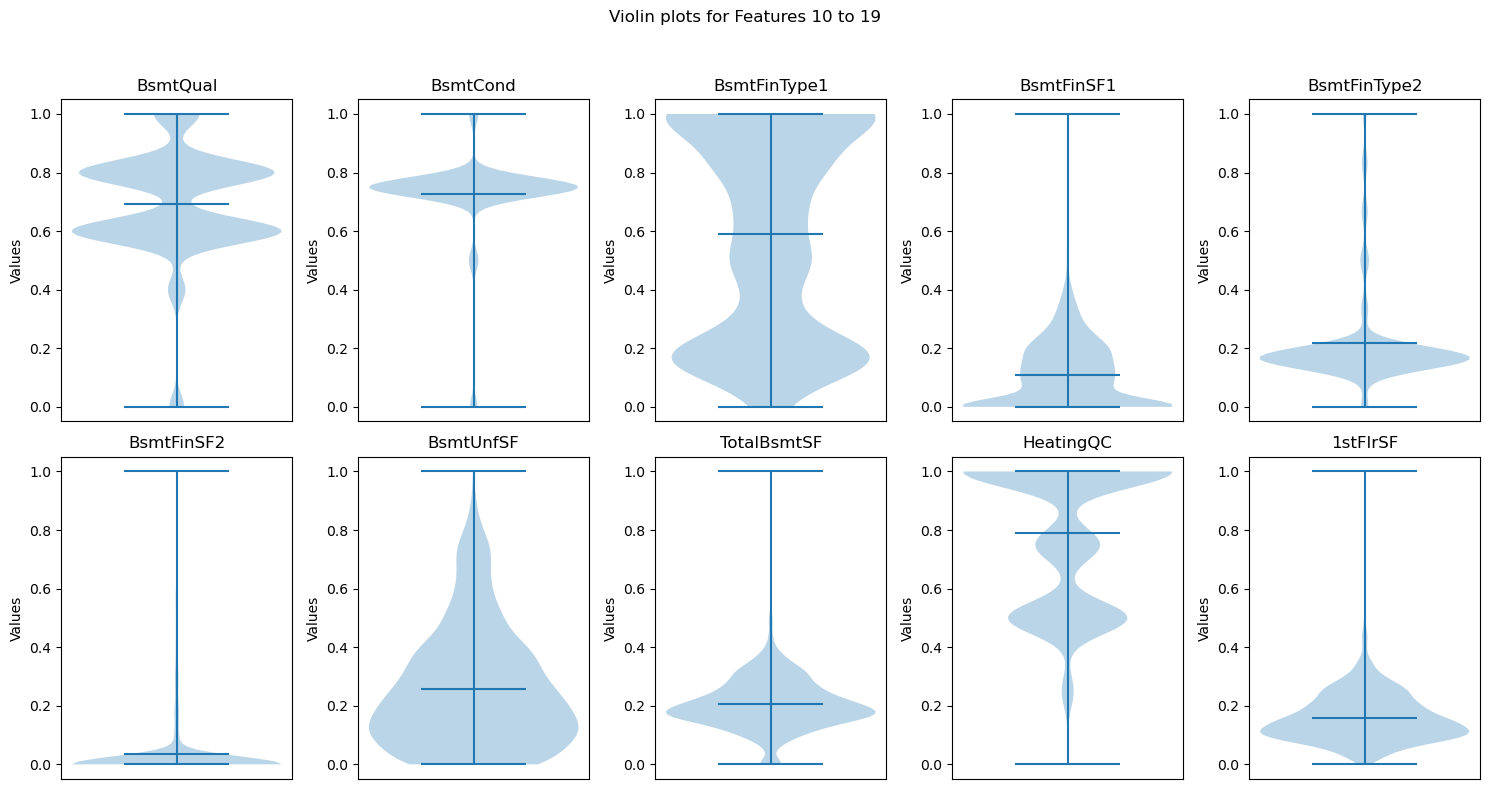

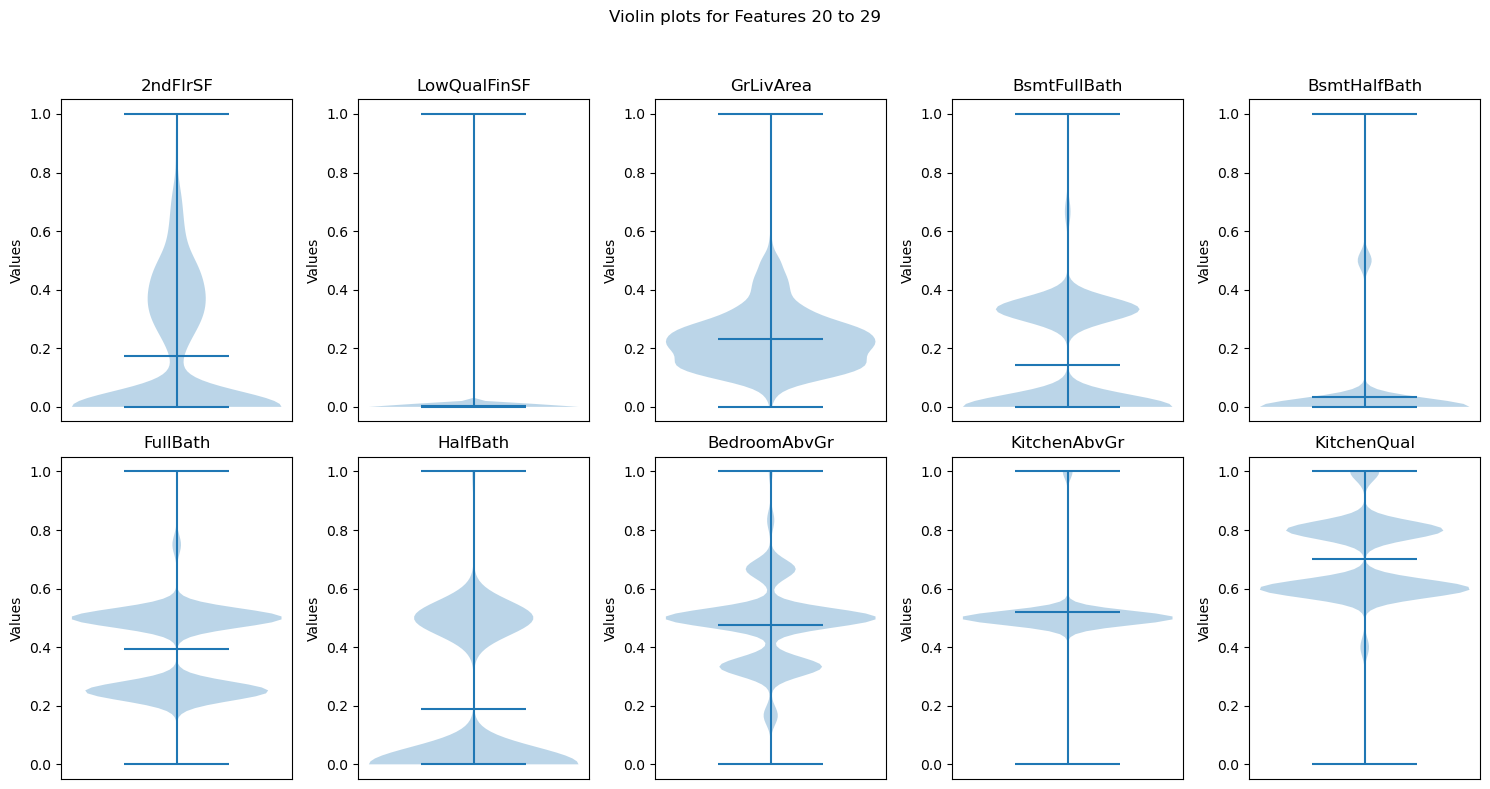

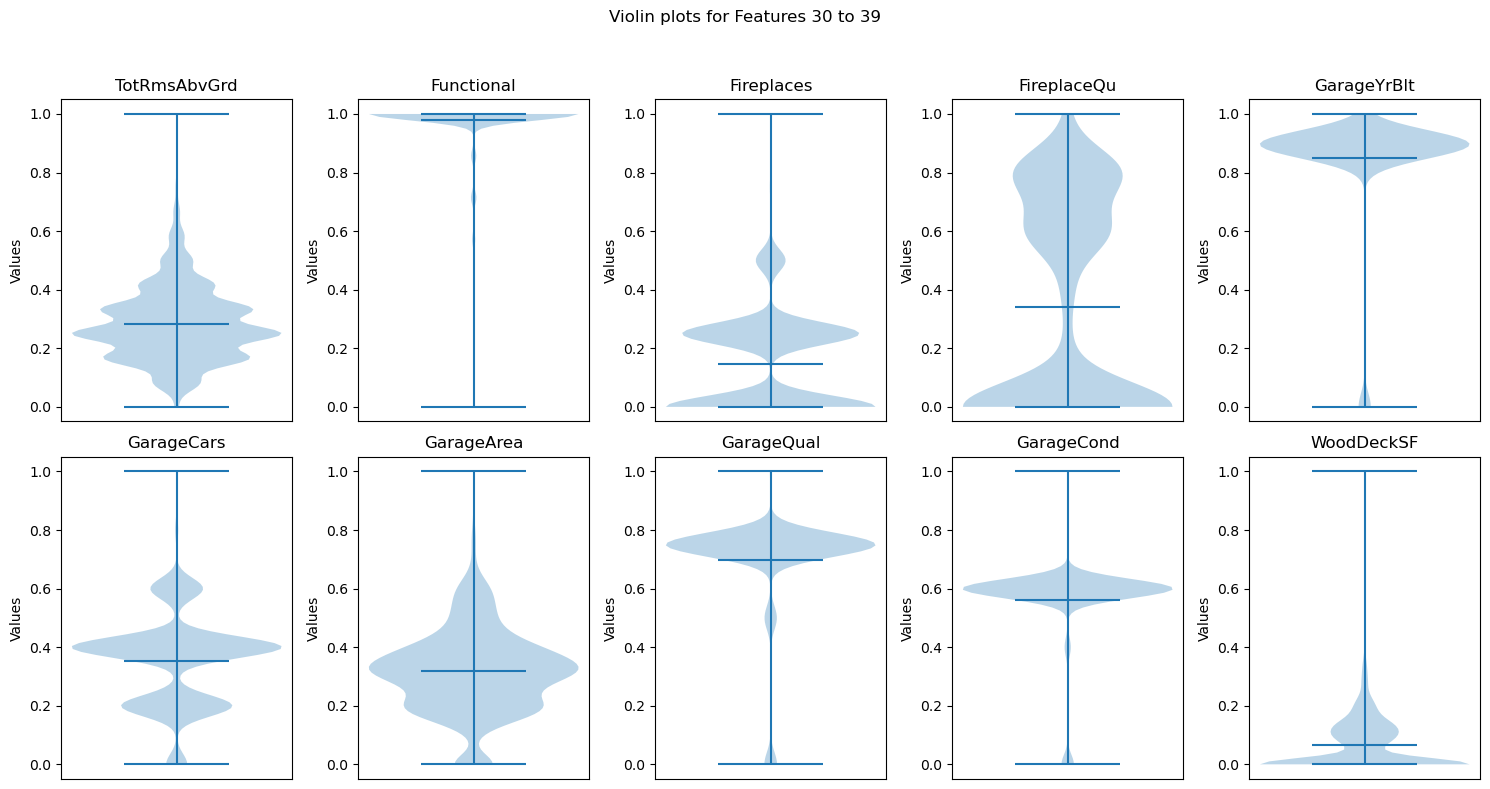

In [258]:
num_figures = len(scaled_df_Standard_testing.columns[0:42]) // 10
for i in range(num_figures):
    start_col = i * 10
    end_col = start_col + 10
    chunk = scaled_df_MinMax_testing.iloc[:, start_col:end_col]

    plt.figure(figsize = (15,8))
    for j, column in enumerate(chunk.columns):
        plt.subplot(2,5,j+1)
        plt.violinplot(chunk[column],showmeans=True)
        plt.title(column)
        plt.xticks([])
        plt.ylabel('Values')
    plt.suptitle(f'Violin plots for Features {start_col} to {end_col -1 }')
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

In this testing, we are going to create a MinMax scaler to test the difference between both types of scalers (Standard vs. MinMax) for both datasets.

In [260]:
scaler_MinMax = MinMaxScaler()

columns_to_scaler_MinMax_training = df_converted_training.drop(columns=['Id'])
columns_to_scaler_MinMax_training = columns_to_scaler_MinMax_training.fillna(0.0)
scaled_data_MinMax_training = scaler_MinMax.fit_transform(columns_to_scaler_MinMax_training)

scaled_df_MinMax_training = pd.DataFrame(scaled_data_MinMax_training, columns=columns_to_scaler_MinMax_training.columns)
scaled_df_MinMax_training = pd.concat([df_converted_training[['Id']], scaled_df_MinMax_training], axis=1)
scaled_df_MinMax_training.drop(columns = ['Id'], inplace=True)

scaled_df_MinMax_training.sample(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1396,0.000000,0.000000,0.261282,0.444444,0.500,0.550725,0.000000,0.0000,0.333333,0.50,0.6,0.75,0.666667,0.062544,0.500000,0.226594,0.025685,0.122259,0.5,0.310464,0.000000,0.0,0.254898,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.333333,0.416667,0.833333,0.666667,0.6,0.978109,0.50,0.403385,0.6,0.6,0.000000,0.000000,0.090580,0.0,0.0,0.0,0.0,0.00,0.000000,0.454545,1.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

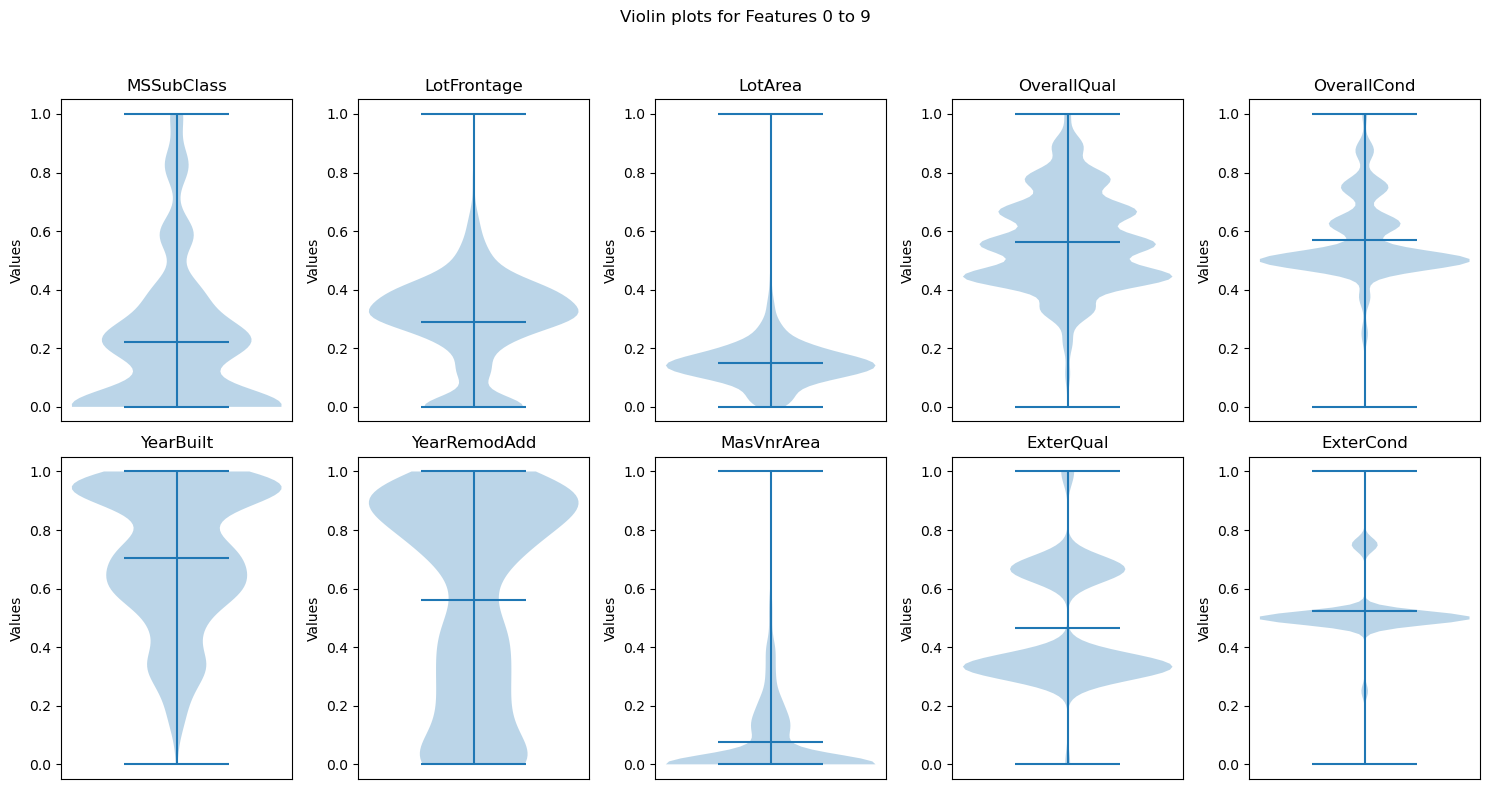

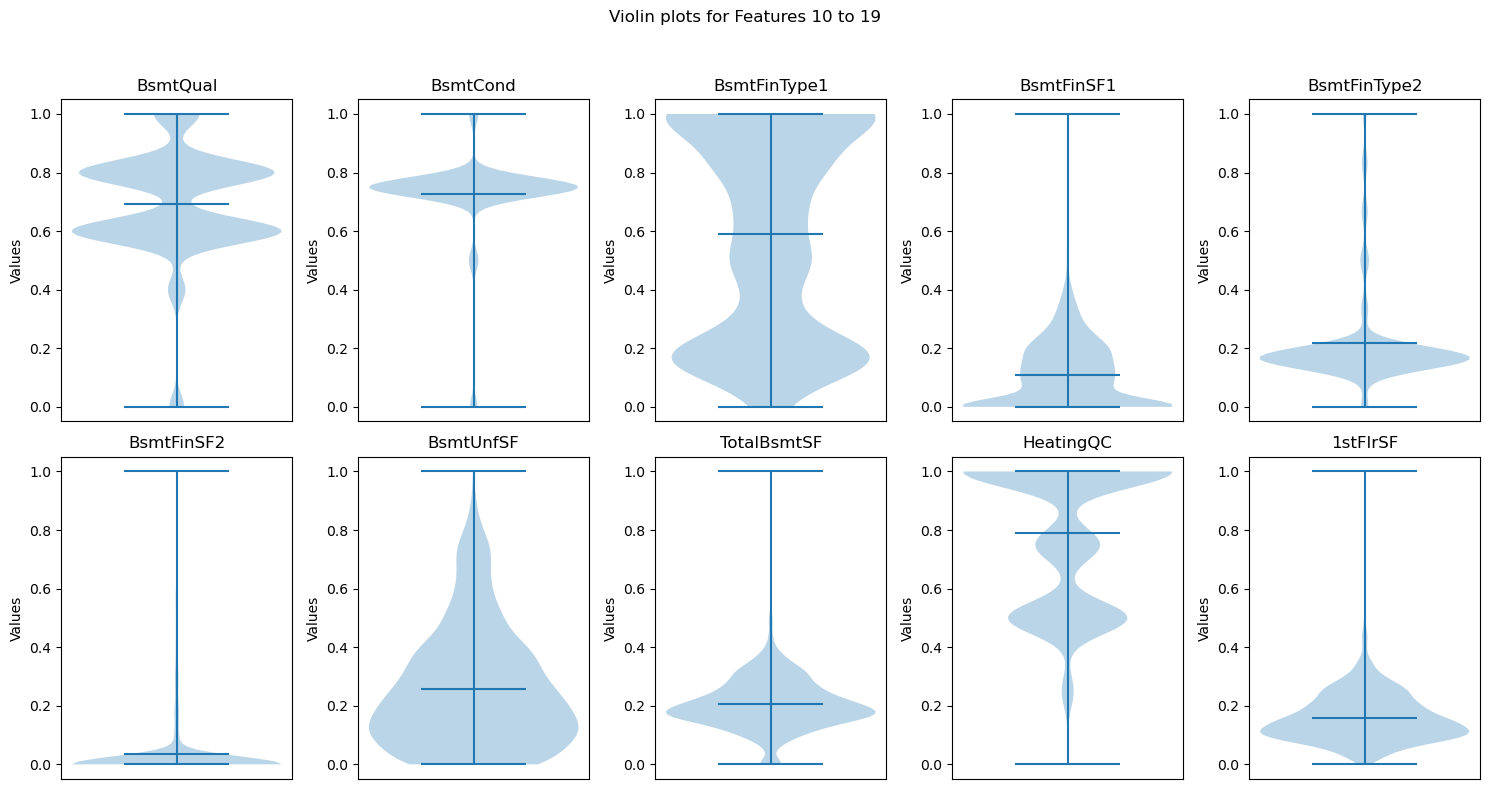

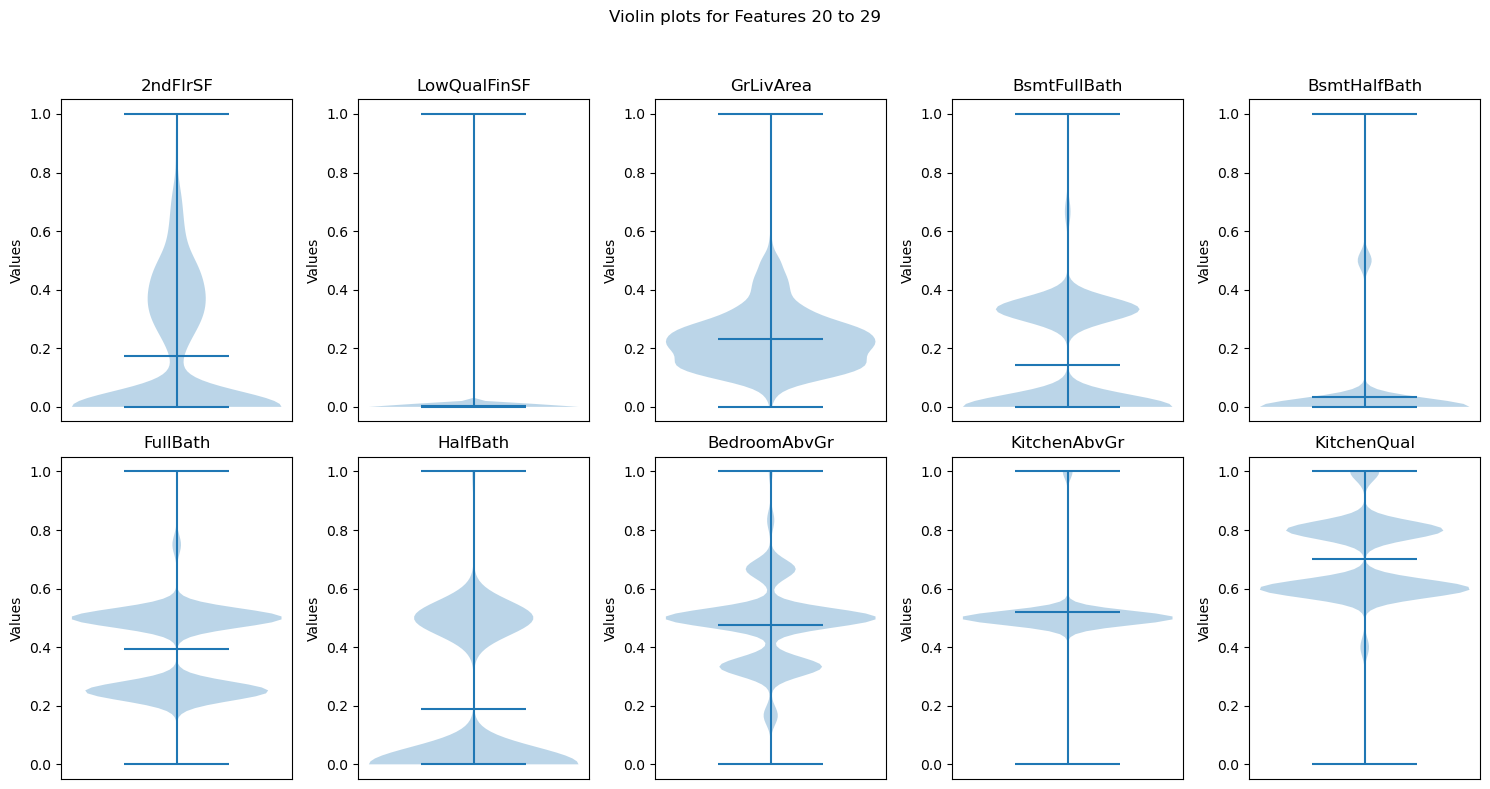

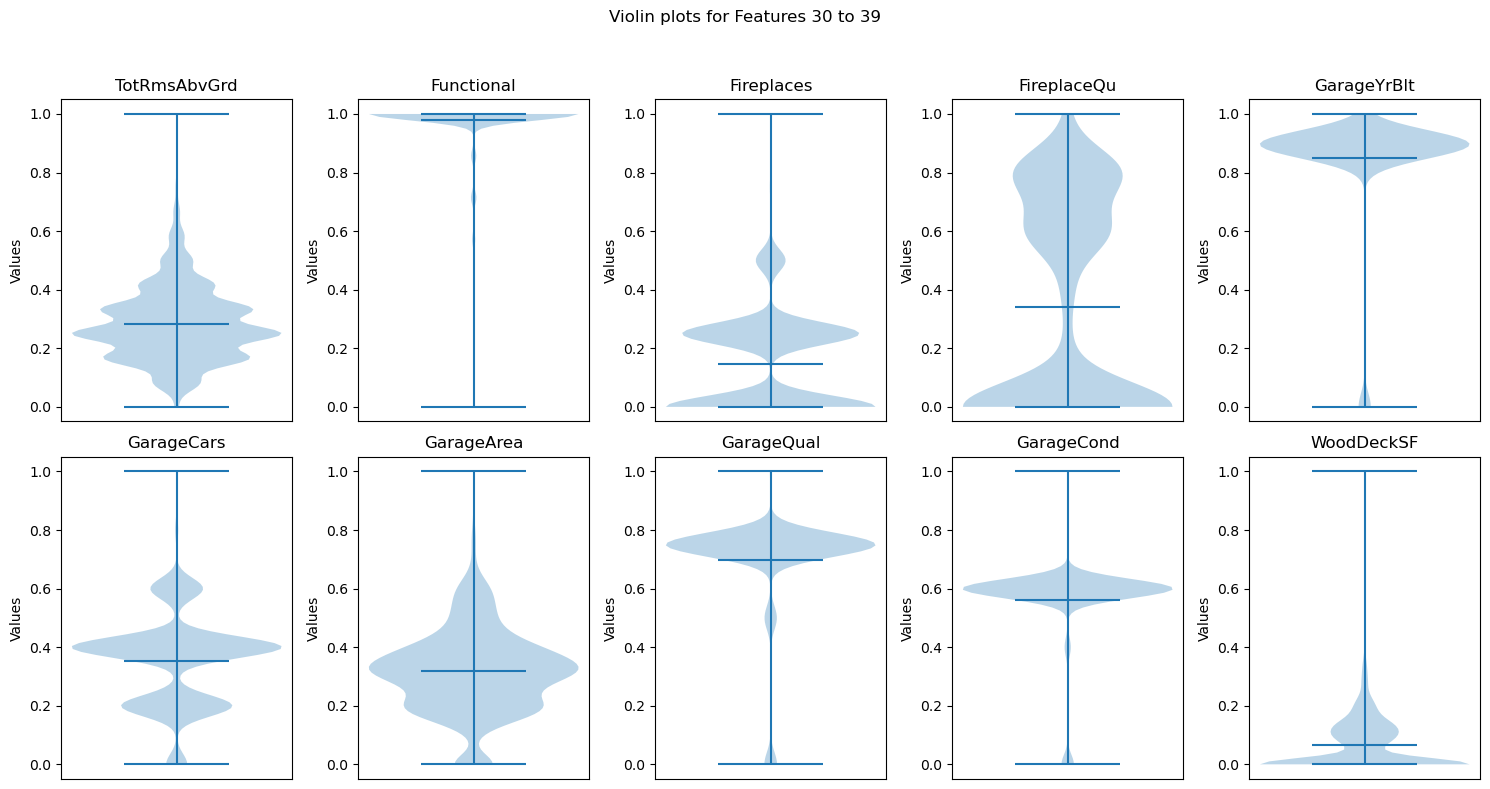

In [261]:
num_figures = len(scaled_df_MinMax_training.columns[0:42]) // 10
for i in range(num_figures):
    start_col = i * 10
    end_col = start_col + 10
    chunk = scaled_df_MinMax_testing.iloc[:, start_col:end_col]

    plt.figure(figsize = (15,8))
    for j, column in enumerate(chunk.columns):
        plt.subplot(2,5,j+1)
        plt.violinplot(chunk[column],showmeans=True)
        plt.title(column)
        plt.xticks([])
        plt.ylabel('Values')
    plt.suptitle(f'Violin plots for Features {start_col} to {end_col -1 }')
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()


In [262]:
columns_to_scaler_MinMax_testing = df_converted_testing.drop(columns=['Id'])

columns_to_scaler_MinMax_testing = columns_to_scaler_MinMax_testing.replace('NA',0)
columns_to_scaler_MinMax_testing = columns_to_scaler_MinMax_testing.fillna(0.0)
scaled_data_MinMax_testing = scaler_MinMax.fit_transform(columns_to_scaler_MinMax_testing)

scaled_df_MinMax_testing = pd.DataFrame(scaled_data_MinMax_testing, columns=columns_to_scaler_MinMax_testing.columns)
scaled_df_MinMax_testing = pd.concat([df_converted_testing[['Id']], scaled_df_MinMax_testing], axis=1)
scaled_df_MinMax_testing.drop(columns = ['Id'], inplace=True)
scaled_df_MinMax_testing.sample(5)

C:\Users\rlars\AppData\Local\Temp\ipykernel_11996\4212920858.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  columns_to_scaler_MinMax_testing = columns_to_scaler_MinMax_testing.replace('NA',0)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
330,0.411765,0.405,0.148757,0.555556,0.50,0.687023,0.316667,0.372093,0.333333,0.5,0.6,0.75,0.166667,0.000000,0.166667,0.0,0.583178,0.244946,0.5,0.179394,0.696026,0.0,0.455845,0.000000,0.0,0.50,1.0,1.000000,1.0,0.6,0.750000,1.0,0.00,0.0,0.892161,0.6,0.609543,0.75,0.6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.636364,0.75,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

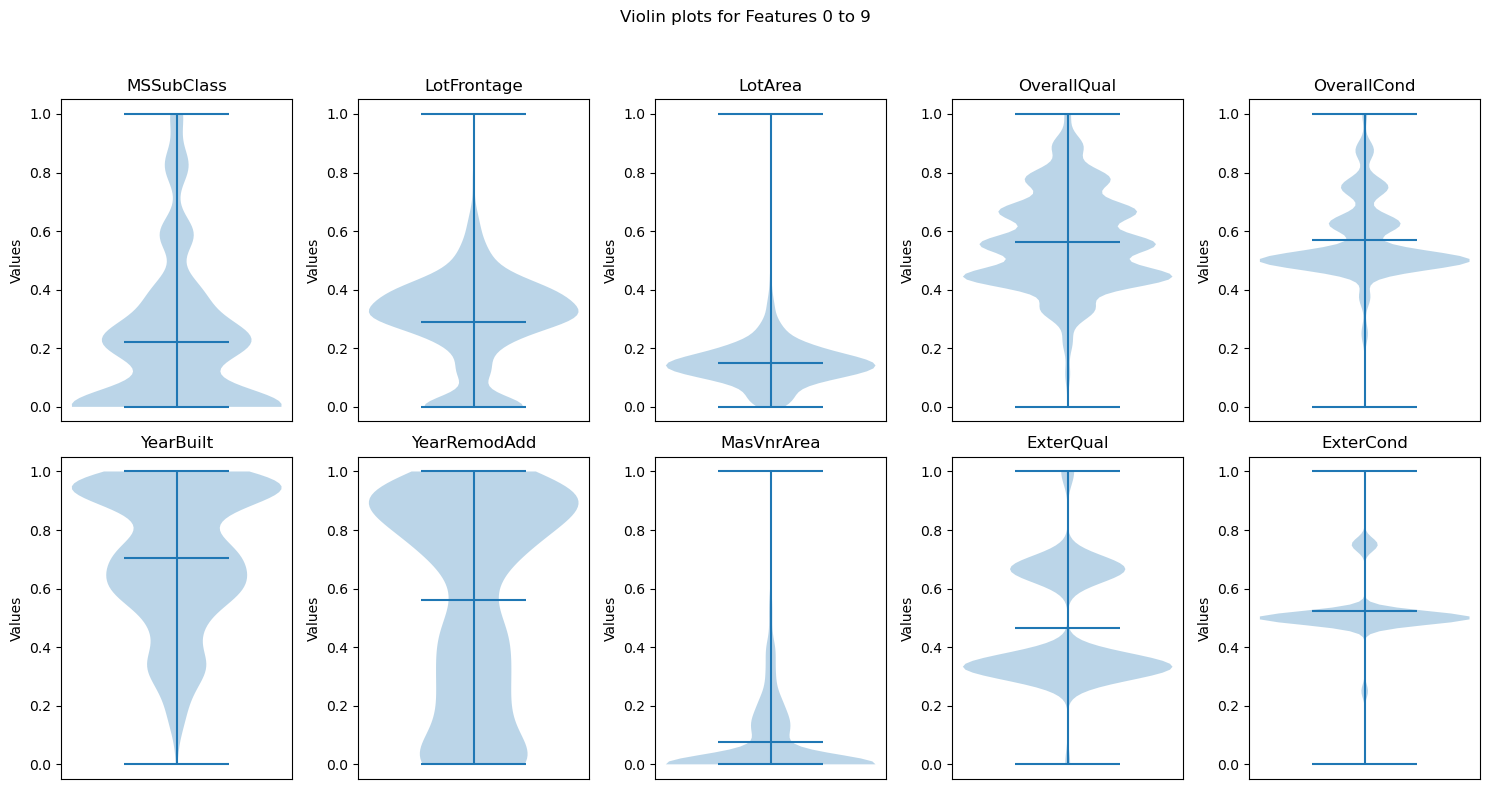

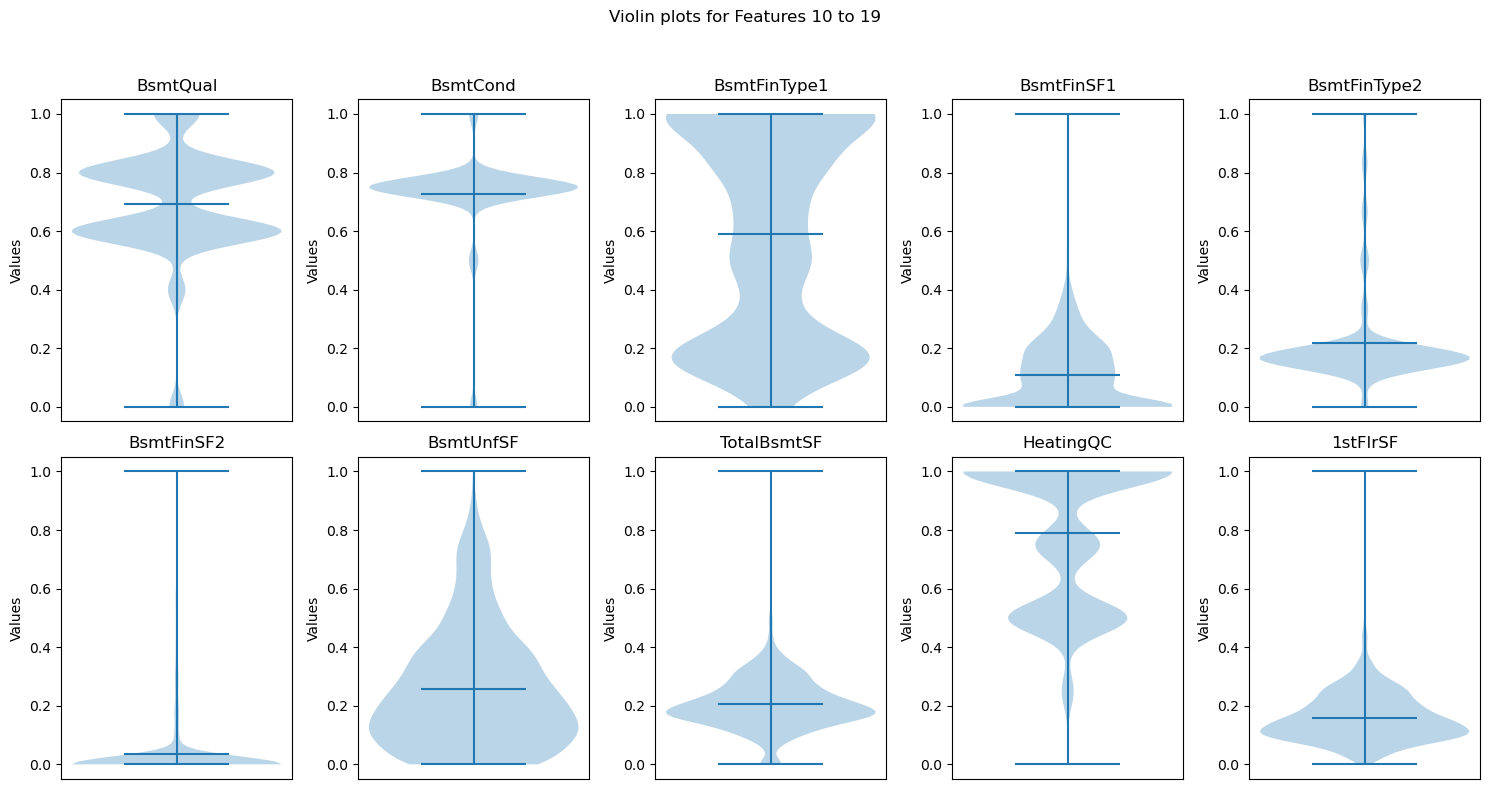

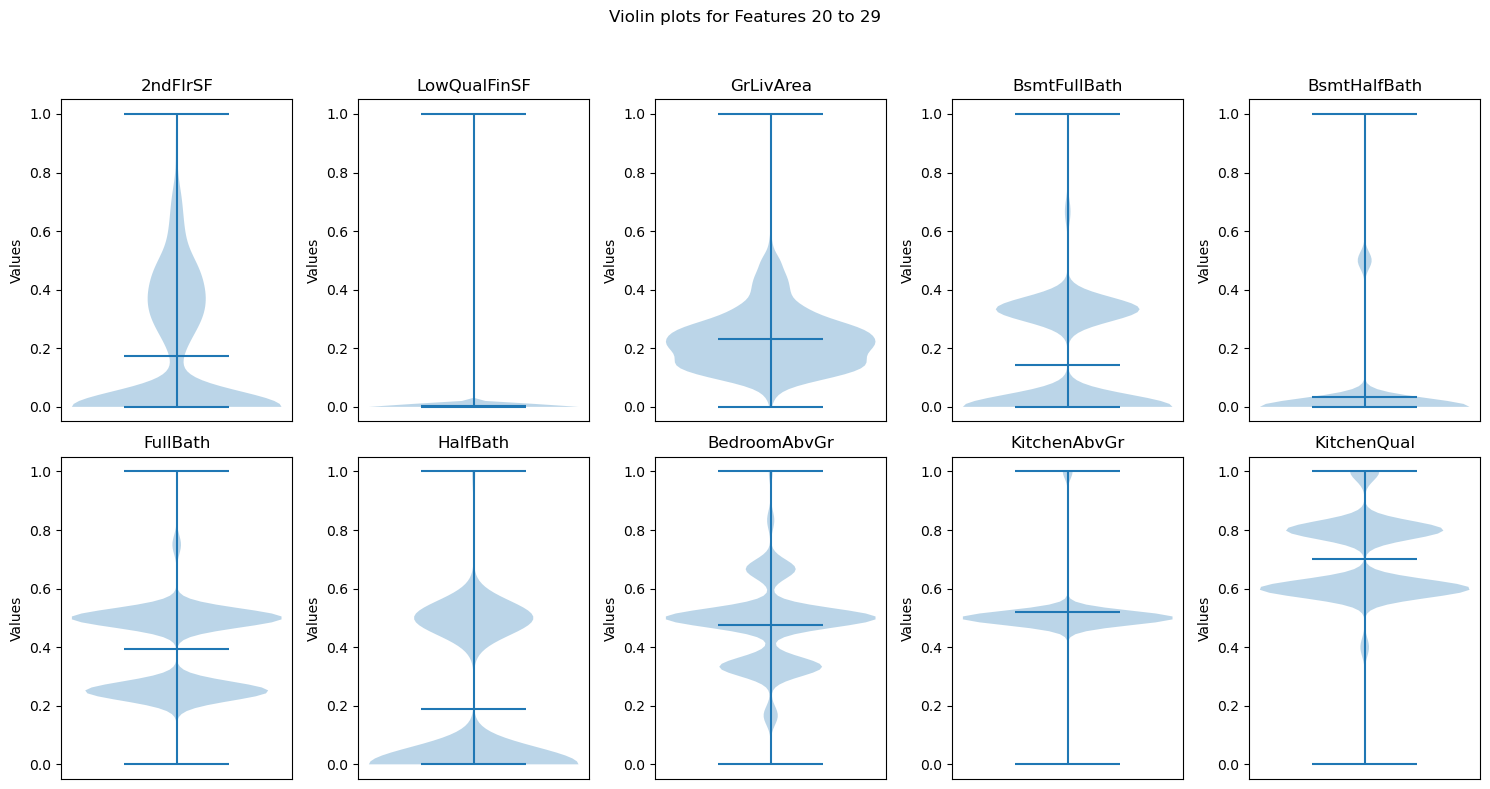

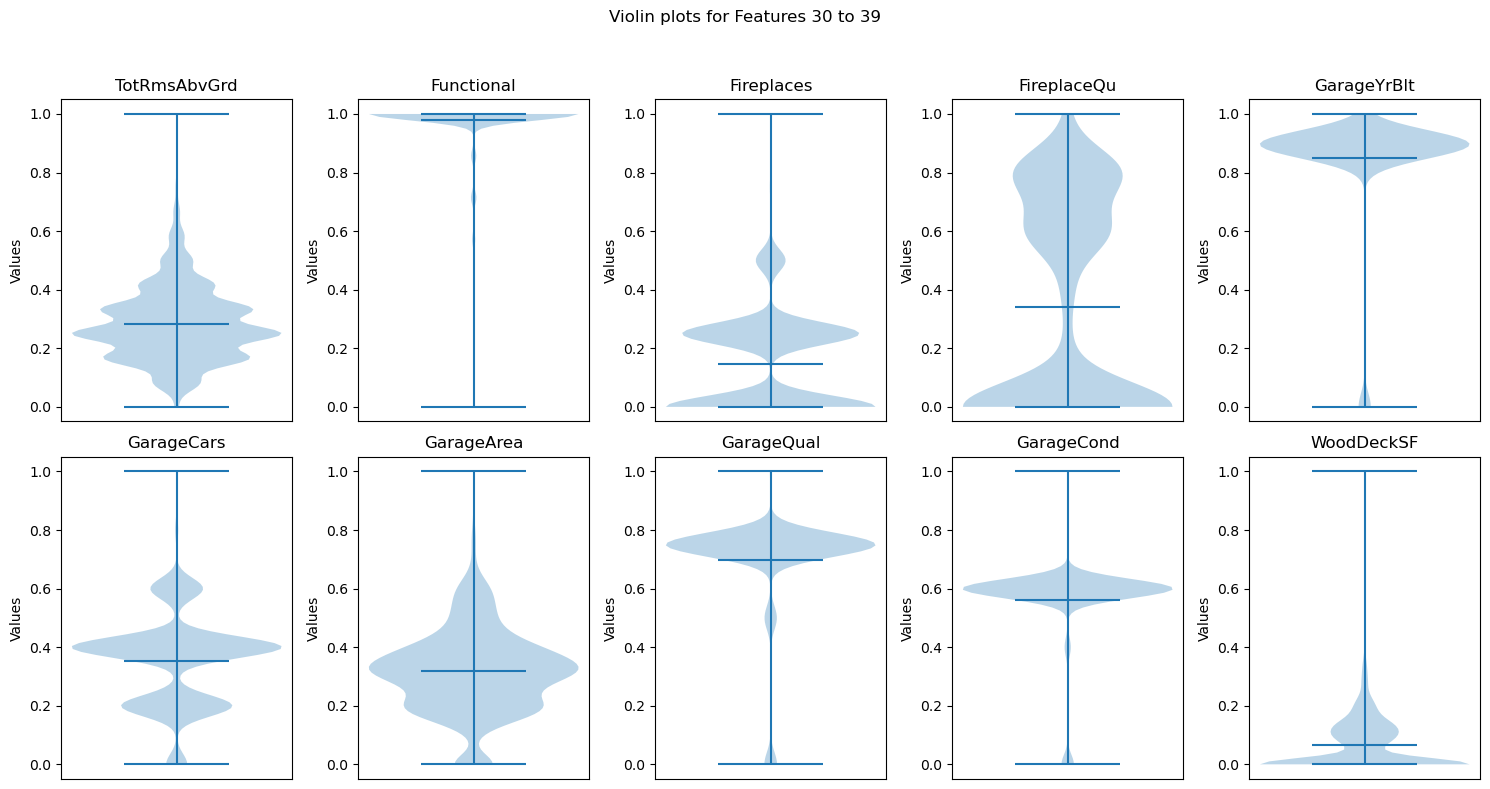

In [265]:
num_figures = len(scaled_df_MinMax_testing.columns[0:42]) // 10
for i in range(num_figures):
    start_col = i * 10
    end_col = start_col + 10
    chunk = scaled_df_MinMax_testing.iloc[:, start_col:end_col]

    plt.figure(figsize = (15,8))
    for j, column in enumerate(chunk.columns):
        plt.subplot(2,5,j+1)
        plt.violinplot(chunk[column],showmeans=True)
        plt.title(column)
        plt.xticks([])
        plt.ylabel('Values')
    plt.suptitle(f'Violin plots for Features {start_col} to {end_col -1 }')
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

In [266]:
scaled_Standard_training_labels = pd.DataFrame(scaler_Standard.fit_transform(training_labels))

Now create the K-fold tests and analyize the accuracies for each test.

In [274]:
kfold = KFold(n_splits=10, shuffle= True, random_state=42)
rmse_Standard = []
y_val_pred_values = []
y_val_fold_values = []
X_train_fold_values = []
y_train_fold_values = []


In [276]:
for training_index, val_index in kfold.split(scaled_df_Standard_training):
    X_train_fold =scaled_df_Standard_training.iloc[training_index]
    X_val_fold = scaled_df_Standard_training.iloc[val_index]
    y_train_fold =scaled_Standard_training_labels.iloc[training_index]
    y_val_fold = scaled_Standard_training_labels.iloc[val_index]

    model = LinearRegression()
    model.fit(X_train_fold,y_train_fold)

    y_val_pred = model.predict(X_val_fold)
    y_val_pred_values.append(y_val_pred)
    y_val_fold_values.append(y_val_fold)
    X_train_fold_values.append(X_train_fold)
    y_train_fold_values.append(y_train_fold) 
    rmse_Standard.append(root_mean_squared_error(y_val_fold,y_val_pred))

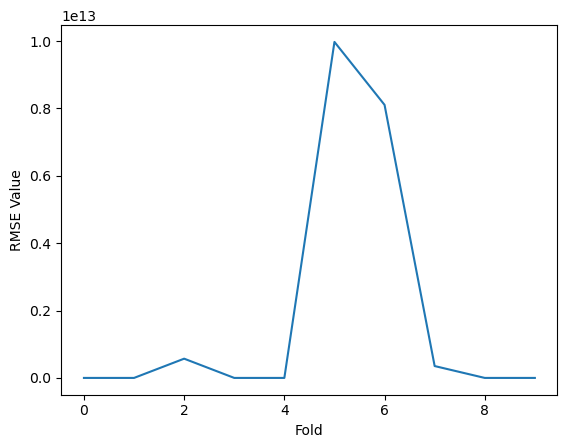

In [278]:
plt.plot(rmse_Standard)
plt.xlabel('Fold')
plt.ylabel('RMSE Value')
plt.show()

In [280]:
print(f"Average RMSE: {np.mean(rmse_Standard):.4f}") 

Average RMSE: 1900300856522.3452


In [282]:
final_model = LinearRegression()
scaled_df_Standard_training.fillna(0.0, inplace=True)
scaled_df_Standard_testing.fillna(0.0, inplace=True)
final_model.fit(scaled_df_Standard_training,scaled_Standard_training_labels)

y_test_pred = final_model.predict(scaled_df_Standard_testing)
y_test_pred = scaler_Standard.inverse_transform(y_test_pred)

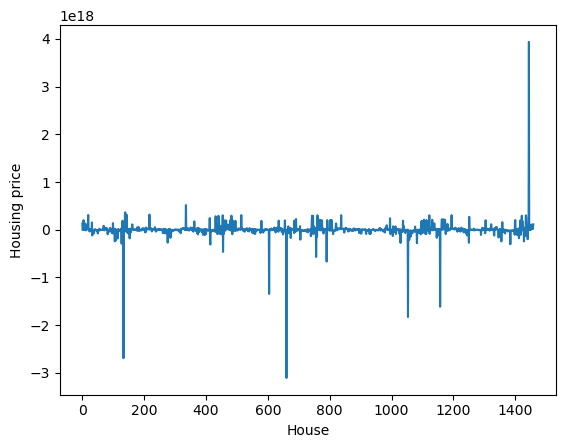

In [284]:
# Plotting the values
plt.plot(y_test_pred)
plt.xlabel('House')
plt.ylabel('Housing price')
plt.show()

Now Testing Min Max Linear Regression

In [287]:
scaled_MinMax_training_labels = pd.DataFrame(scaler_MinMax.fit_transform(training_labels))

In [289]:
kfold = KFold(n_splits=10, shuffle= True, random_state=42)
rmse_MinMax = []
y_val_pred_values = []
y_val_fold_values = []
X_train_fold_values = []
y_train_fold_values = []

In [291]:
for training_index, val_index in kfold.split(scaled_df_MinMax_training):
    X_train_fold =scaled_df_MinMax_training.iloc[training_index]
    X_val_fold = scaled_df_MinMax_training.iloc[val_index]
    y_train_fold =scaled_MinMax_training_labels.iloc[training_index]
    y_val_fold = scaled_MinMax_training_labels.iloc[val_index]

    model = LinearRegression()
    model.fit(X_train_fold,y_train_fold)

    y_val_pred = model.predict(X_val_fold)
    y_val_pred_values.append(y_val_pred)
    y_val_fold_values.append(y_val_fold)
    X_train_fold_values.append(X_train_fold)
    y_train_fold_values.append(y_train_fold)
    rmse_MinMax.append(root_mean_squared_error(y_val_fold,y_val_pred))

In [303]:
print(rmse_MinMax)

[0.0456651814724333, 0.04216094836161996, 9477343988.764631, 0.057947690997072525, 0.0536872651468044, 3080106885.128749, 35141555417.068, 1388850817.0329387, 0.03453767674916351, 0.04110059418732898]


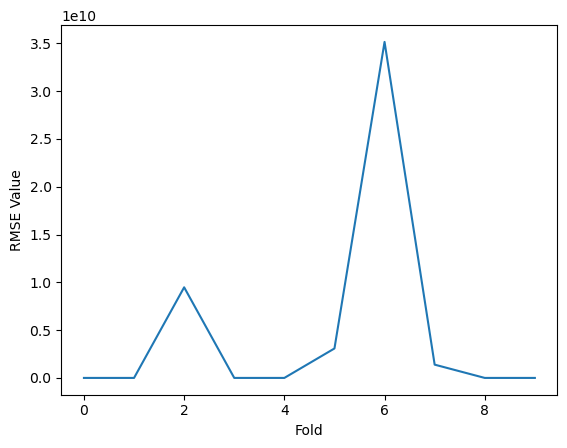

In [293]:
plt.plot(rmse_MinMax)
plt.xlabel('Fold')
plt.ylabel('RMSE Value')
plt.show()

In [295]:
print(f"Average RMSE: {np.mean(rmse_MinMax):.4f}") 

Average RMSE: 4908785710.8269


In [297]:
final_model = LinearRegression()
final_model.fit(scaled_df_MinMax_training,scaled_MinMax_training_labels)

y_test_pred = final_model.predict(scaled_df_MinMax_testing)
y_test_pred = scaler_Standard.inverse_transform(y_test_pred)

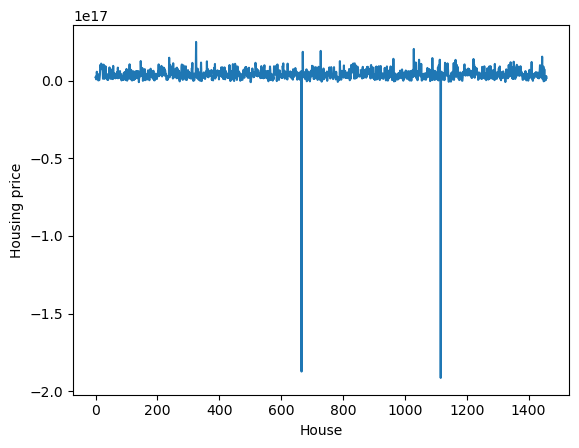

In [299]:
# Plotting the values
plt.plot(y_test_pred)
plt.xlabel('House')
plt.ylabel('Housing price')
plt.show()